# Written by - Paul Kang, Ore Quality EIT
# Contact: pkang@suncor.com | +1-(780)-215-4631
# With interest of - Advanced Analytics

#Production MLOps MLP model using tensorflow:

MATLAB regressionLearner / feedforward neural network model practice has proven its worth deep dive into the plant 300 production model. In this practice, tensorflow library will be used, and as a extra, PCA enabled K-means clustering will be used to classify the plant reaction depending on the raw material feed quality.

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import shap
%matplotlib inline
df = pd.read_csv("/dbfs/mnt/mineeoa-adhoc/data/dry_end/Colab.csv")
print(df.columns[:-1])
df.dtypes

Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
Index(['P82_OILSAND_MASS_VCALC', 'SB_MB_30M', 'SB_Fines_30M', 'SB_D50_30M',
 '82TI867', 'BYPASS', '300DI1002', '300AI1011', 'Breaker Water/Ore',
 'Froth underwash', 'froth temperature', 'L9 Feed HPW',
 'Sep cell underflow', 'Sep cell % speed', 'Middlings flow', 'HT Dens',
 'HT Temp', 'HPW Usage/Intensity', 'SB_CL', 'SB_BIT', '300DI1'],
 dtype='object')
Out[1]: P82_OILSAND_MASS_VCALC float64
SB_MB_30M float64
SB_Fines_30M float64
SB_D50_30M float64
82TI867 float64
BYPASS float64
300DI1002 float64
300AI1011 float64
Breaker Water/Ore float64
Froth underwash float64
froth temperature float64
L9 Feed HPW float64
Sep cell underflow float64
Sep cell % speed float64
Middlings flow float64
HT Dens float64
HT Temp float64
HPW Usage/Intensity float64
SB_CL float64
SB_BIT float64
300DI1 float64
F/O float64
dtype: object

Data Preprocessing/Wrangling is done in previous work step session. Exploratory Data Analysis, refer to section 3.8 of the formal report

In [0]:
ivar = df[['P82_OILSAND_MASS_VCALC', 'SB_MB_30M', 'SB_Fines_30M', 'SB_D50_30M',
       '82TI867', 'BYPASS', '300DI1002', '300AI1011', 'Breaker Water/Ore',
       'Froth underwash', 'froth temperature', 'L9 Feed HPW',
       'Sep cell underflow', 'Sep cell % speed', 'Middlings flow', 'HT Dens',
       'HT Temp', 'HPW Usage/Intensity', 'SB_CL', 'SB_BIT', '300DI1']]
dvar = df[['F/O']]

In [0]:
df.describe()

,P82_OILSAND_MASS_VCALC,SB_MB_30M,SB_Fines_30M,SB_D50_30M,82TI867,BYPASS,300DI1002,300AI1011,Breaker Water/Ore,Froth underwash,froth temperature,L9 Feed HPW,Sep cell underflow,Sep cell % speed,Middlings flow,HT Dens,HT Temp,HPW Usage/Intensity,SB_CL,SB_BIT,300DI1,F/O
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,9366.127148,177.244293,14.287466,169.337384,83.292316,0.347842,1.186237,2.652230,1.804130,597.176874,68.265854,36.547803,4275.756779,77.746165,1642.371717,1.445831,48.660318,200.443370,102.849921,11.974586,0.947272,1.046231
std,2296.706051,33.859003,2.212739,9.618842,3.123397,0.426765,0.086638,0.186479,0.573144,62.846125,9.225029,92.497200,619.360615,5.821377,353.711332,0.053363,2.971293,57.198640,19.559708,0.464359,0.014911,0.098640
min,3112.476805,97.406135,9.109629,127.398848,45.247660,0.000000,1.025117,1.829863,0.952527,0.000000,5.925409,0.000000,220.095218,26.983993,203.888711,1.204490,40.655747,123.569505,48.756761,10.692879,0.900009,0.639124
25%,7974.584619,155.135691,12.787619,163.498178,82.395121,0.000000,1.116785,2.524400,1.426316,599.975972,62.877504,0.000000,3915.867996,75.166458,1440.845475,1.413706,46.629045,164.649102,88.751965,11.663894,0.940570,0.988037
50%,9331.635124,177.060677,14.281390,169.092067,84.087888,0.000000,1.176160,2.659477,1.684581,600.017869,68.123545,0.413582,4196.107633,77.796881,1672.576183,1.456459,48.578929,184.185959,103.625180,11.982285,0.949412,1.055089
75%,11159.123930,196.627623,15.466759,175.205843,85.208683,0.833333,1.255297,2.789450,1.992670,602.881739,75.744188,21.216577,4635.090864,80.507101,1870.576454,1.483765,50.653474,216.855999,115.684987,12.282903,0.955737,1.111769
max,14446.743040,283.676682,20.904636,203.692788,87.618328,1.000000,1.464557,3.118083,5.617123,736.237714,84.805960,893.968354,7717.406360,91.778669,2564.562519,1.549733,59.013799,674.928353,158.478917,13.323557,1.102064,1.548429


In [0]:
# Neural network 
X_initial = tf.keras.layers.Input(shape=[21])
H_Initial = tf.keras.layers.Dense(50)(X_initial)
H_Initial = tf.keras.layers.BatchNormalization()(H_Initial)
H_Initial = tf.keras.layers.Activation('swish')(H_Initial)

H_Initial = tf.keras.layers.Dense(25)(H_Initial)
H_Initial = tf.keras.layers.BatchNormalization()(H_Initial)
H_Initial = tf.keras.layers.Activation('swish')(H_Initial)

H_Initial = tf.keras.layers.Dense(10)(H_Initial)
H_Initial = tf.keras.layers.BatchNormalization()(H_Initial)
H_Initial = tf.keras.layers.Activation('swish')(H_Initial)

Y_Initial = tf.keras.layers.Dense(1)(H_Initial)
model_Initial = tf.keras.models.Model(X_initial,Y_Initial)
model_Initial.compile(loss='mse')

In [0]:
model_Initial.fit(ivar,dvar,epochs=1,verbose=True)
total_error = tf.reduce_sum(tf.square(tf.subtract(dvar,tf.reduce_mean(dvar))))
unexplained_error = tf.reduce_sum(tf.square(tf.subtract(dvar,model_Initial.predict(ivar[:]))))
R_squared = tf.subtract(1,tf.divide(unexplained_error,total_error))
print(R_squared)

tostring() is deprecated. Use tobytes() instead.
tostring() is deprecated. Use tobytes() instead.
 1/24 [>.............................] - ETA: 0s - loss: 2.816824/24 [==============================] - 0s 2ms/step - loss: 1.4795
tf.Tensor(-91.45369849036395, shape=(), dtype=float64)

In [0]:
while R_squared < 0.9:

  model_Initial.fit(ivar,dvar,epochs=1,verbose=0)
  total_error = tf.reduce_sum(tf.square(tf.subtract(dvar,tf.reduce_mean(dvar))))
  unexplained_error = tf.reduce_sum(tf.square(tf.subtract(dvar,model_Initial.predict(ivar[:]))))
  R_squared = tf.subtract(1,tf.divide(unexplained_error,total_error))

print(R_squared)

tostring() is deprecated. Use tobytes() instead.
tostring() is deprecated. Use tobytes() instead.
tostring() is deprecated. Use tobytes() instead.
tostring() is deprecated. Use tobytes() instead.
tostring() is deprecated. Use tobytes() instead.
tostring() is deprecated. Use tobytes() instead.
tostring() is deprecated. Use tobytes() instead.
tostring() is deprecated. Use tobytes() instead.
tostring() is deprecated. Use tobytes() instead.
tostring() is deprecated. Use tobytes() instead.
tostring() is deprecated. Use tobytes() instead.
tostring() is deprecated. Use tobytes() instead.
tostring() is deprecated. Use tobytes() instead.
tostring() is deprecated. Use tobytes() instead.
tostring() is deprecated. Use tobytes() instead.
tostring() is deprecated. Use tobytes() instead.
tostring() is deprecated. Use tobytes() instead.
tostring() is deprecated. Use tobytes() instead.
tostring() is deprecated. Use tobytes() instead.
tostring() is deprecated. Use tobytes() instead.
tostring() is deprecated. Use tobytes() instead.
tostring() is deprecated. Use tobytes() instead.
tostring() is deprecated. Use tobytes() instead.
tostring() is deprecated. Use tobytes() instead.
tostring() is deprecated. Use tobytes() instead.
tostring() is deprecated. Use tobytes() instead.
tostring() is deprecated. Use tobytes() instead.
tostring() is deprecated. Use tobytes() instead.
tostring() is deprecated. Use tobytes() instead.
tostring() is deprecated. Use tobytes() instead.
tostring() is deprecated. Use tobytes() instead.
tostring() is deprecated. Use tobytes() instead.
tostring() is deprecated. Use tobytes() instead.
tostring() is deprecated. Use tobytes() instead.
tostring() is deprecated. Use tobytes() instead.
tostring() is deprecated. Use tobytes() instead.
tostring() is deprecated. Use tobytes() instead.
tostring() is deprecated. Use tobytes() instead.
tostring() is deprecated. Use tobytes() instead.
tostring() is deprecated. Use tobytes() instead.
tostring() is deprecated. Use tobytes() instead.
tostring() is deprecated. Use tobytes() instead.
tostring() is deprecated. Use tobytes() instead.
tostring() is deprecated. Use tobytes() instead.
tostring() is deprecated. Use tobytes() instead.
tostring() is deprecated. Use tobytes() instead.
tostring() is deprecated. Use tobytes() instead.
tostring() is deprecated. Use tobytes() instead.
tostring() is deprecated. Use tobytes() instead.
tostring() is deprecated. Use tobytes() instead.
tostring() is deprecated. Use tobytes() instead.
tostring() is deprecated. Use tobytes() instead.
tostring() is deprecated. Use tobytes() instead.
tostring() is deprecated. Use tobytes() instead.
tostring() is deprecated. Use tobytes() instead.
tostring() is deprecated. Use tobytes() instead.
tostring() is deprecated. Use tobytes() instead.
tostring() is deprecated. Use tobytes() instead.
tostring() is deprecated. Use tobytes() instead.
tostring() is deprecated. Use tobytes() instead.
tostring() is deprecated. Use tobytes() instead.
tostring() is deprecated. Use tobytes() instead.
tostring() is deprecated. Use tobytes() instead.
tostring() is deprecated. Use tobytes() instead.
tostring() is deprecated. Use tobytes() instead.
tostring() is deprecated. Use tobytes() instead.
tostring() is deprecated. Use tobytes() instead.
tostring() is deprecated. Use tobytes() instead.
tostring() is deprecated. Use tobytes() instead.
tostring() is deprecated. Use tobytes() instead.
tostring() is deprecated. Use tobytes() instead.
tostring() is deprecated. Use tobytes() instead.
tostring() is deprecated. Use tobytes() instead.
tostring() is deprecated. Use tobytes() instead.
tostring() is deprecated. Use tobytes() instead.
tostring() is deprecated. Use tobytes() instead.
tostring() is deprecated. Use tobytes() instead.
tostring() is deprecated. Use tobytes() instead.
tostring() is deprecated. Use tobytes() instead.
tostring() is deprecated. Use tobytes() instead.
tostring() is deprecated. Use tobytes() instead.
tostring() is deprecated. Use t

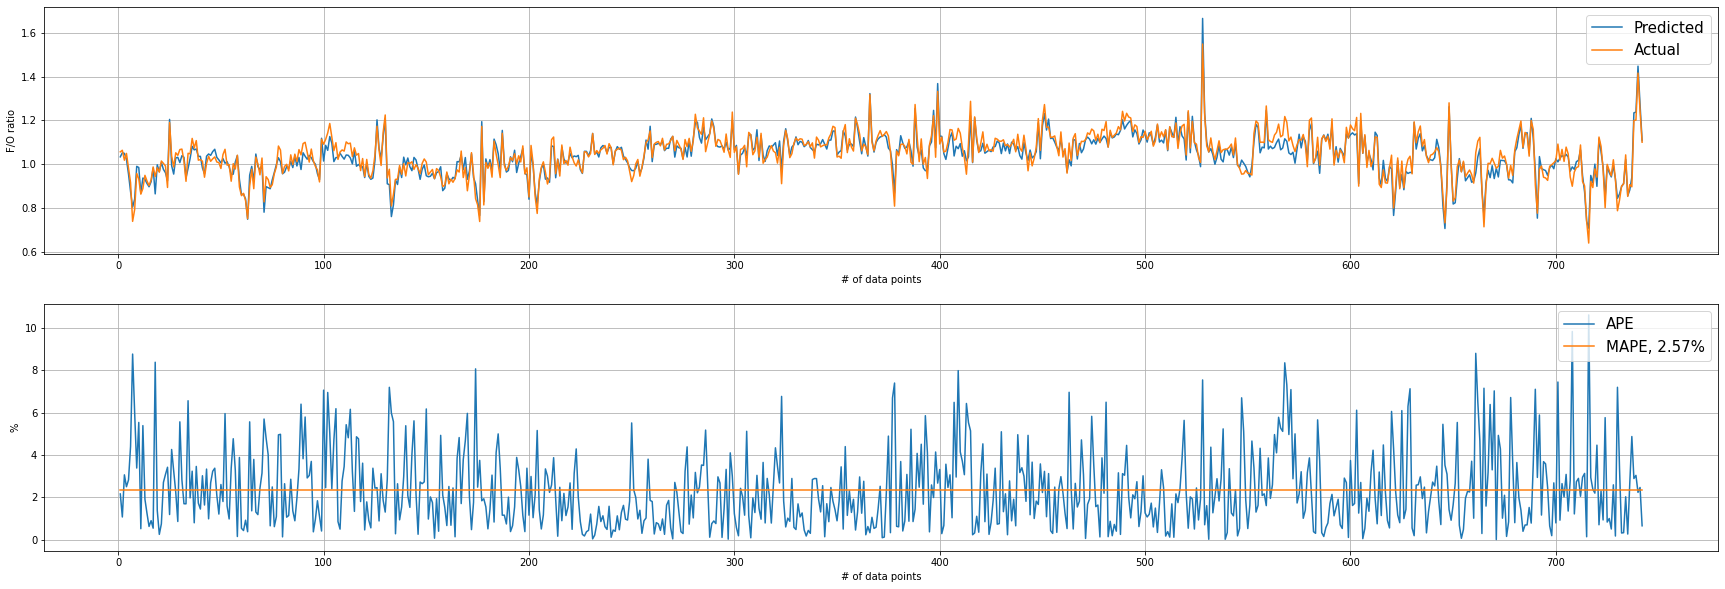

In [0]:
y_hat = model_Initial.predict(ivar[:])
print(y_hat.shape,dvar.shape)
x = np.linspace(1,742,742)
fig, ax = plt.subplots(figsize=(30,10))

plt.subplot(2,1,1)
plt.plot(x,y_hat,label="Predicted")
plt.plot(x,dvar,label="Actual")
plt.xlabel('# of data points')
plt.ylabel('F/O ratio')
plt.legend(fontsize=15)
plt.grid()

plt.subplot(2,1,2)
plt.plot(x,abs(y_hat-dvar)/dvar*100,label="APE")

MAPE = [abs(y_hat-dvar)/dvar*100]
avg = [np.mean(MAPE) for i in x]

plt.plot(x,avg,label = "MAPE, 2.57%")
plt.xlabel('# of data points')
plt.ylabel('%')
plt.legend(fontsize=15,loc='upper right')
plt.grid()


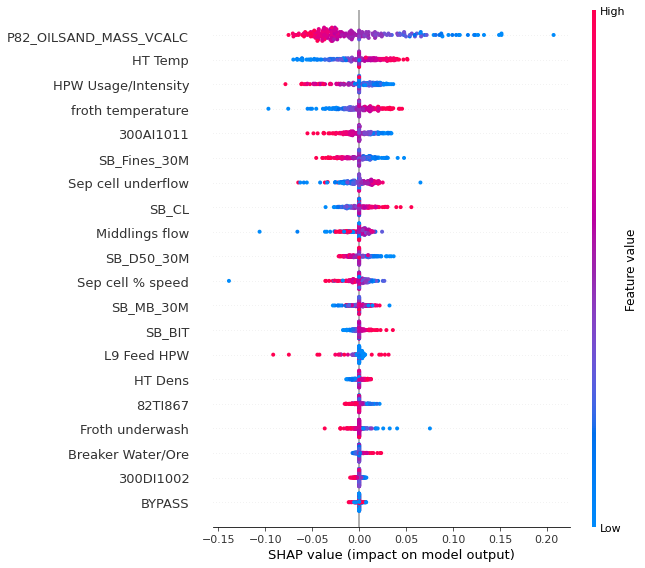

In [0]:
import ipywidgets as widgets

# Create the list of all labels for the drop down list
list_of_labels = ivar.columns.to_list()

# Create a list of tuples so that the index of the label is what is returned
tuple_of_labels = list(zip(list_of_labels, range(len(list_of_labels))))

# Create a widget for the labels and then display the widget
current_label = widgets.Dropdown(options=tuple_of_labels,
                              value=0,
                              description='Select Label:'
                              )

# Display the dropdown list (Note: access index value with 'current_label.value')
current_label

explainer = shap.KernelExplainer(model = model_Initial.predict, data = ivar.head(200), link = "identity")
shap_values = explainer.shap_values(X = ivar.iloc[0:200,:], nsamples = 300)
shap.initjs()

print(f'Current Label Shown: {list_of_labels[current_label.value]}\n')

shap.summary_plot(shap_values = shap_values[current_label.value],
                  features = ivar.iloc[0:200,:]
                  )

according to feature importance, SHAP, tonnage has significant impact... lets try to do regression between F/O and TPH

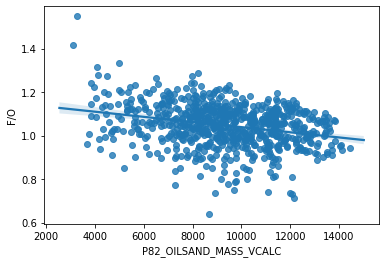

In [0]:
df = pd.merge(ivar,dvar,right_index=True, left_index=True)
sns.regplot(x = 'P82_OILSAND_MASS_VCALC',y = 'F/O',data = df)
# df

In [0]:
sample_data_route = "/dbfs/mnt/mineeoa-adhoc/data/dry_end/Sample_data.csv"
sampled_data = pd.read_csv(sample_data_route)
sampled_data.columns

sample_ivar = sampled_data[['P82_OILSAND_MASS_VCALC', 'SB_MB_30M', 'SB_Fines_30M', 'SB_D50_30M',
       '82TI867', 'BYPASS', '300DI1002', '300AI1011', 'Breaker Water/Ore',
       'Froth underwash', 'froth temperature', 'L9 Feed HPW',
       'Sep cell underflow', 'Sep cell % speed', 'Middlings flow', 'HT Dens',
       'HT Temp', 'HPW Usage/Intensity', 'SB_CL', 'SB_BIT', '300DI1']]
sample_dvar = sampled_data[['F/O']]

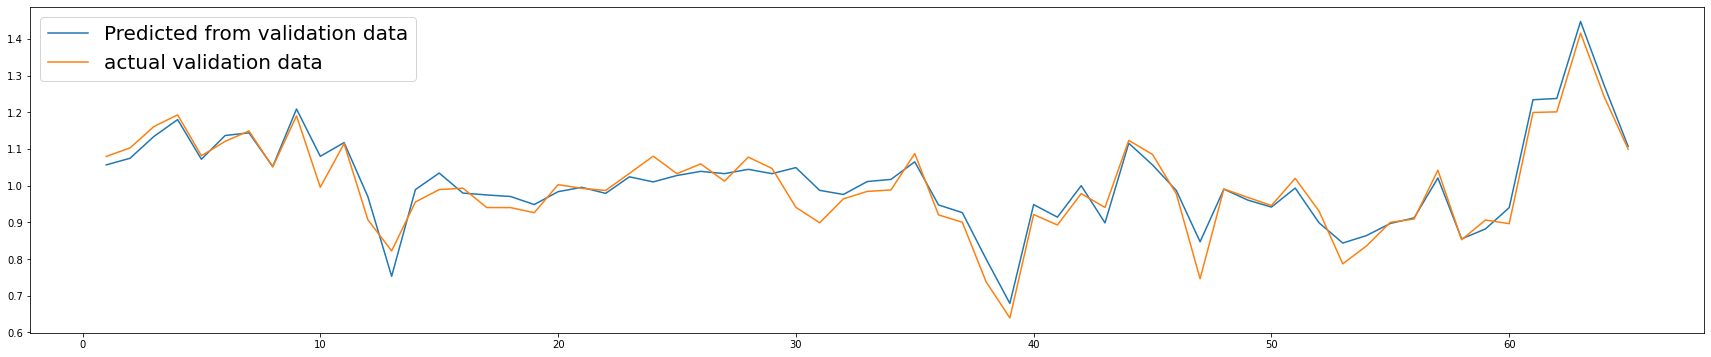

In [0]:
y_sample = model_Initial.predict(sample_ivar[:])
x = np.linspace(1,65,65)
fig, ax = plt.subplots(figsize=(30,6))
plt.plot(x,y_sample,label="Predicted from validation data")
plt.plot(x,sample_dvar,label="actual validation data")
plt.legend(fontsize=20)

#Plant F/O production efficiency study:

K means, PCA enabled clustering is used to classify the data into 3 different groups and associated variable behaviors.

In [0]:
df = pd.read_csv('/dbfs/mnt/mineeoa-adhoc/data/dry_end/bitumen_df.csv')
%matplotlib inline
df.drop('DATE',axis=1,inplace=True)
df.columns

Out[80]: Index(['SB_BIT', 'SB_FINES', 'TAIL LOSS', 'P300_PROD_FROTH_OSG_BIT_PCT', 'F/O',
 'SB_MB'],
 dtype='object')

In [0]:
# Normalize it
scaler = StandardScaler()
segmentation_std = scaler.fit_transform(df)
segmentation_std

Out[81]: array([[ 0.82227274, -1.52131993, -0.69841878, 2.12309007, -0.40946793,
 -2.03789566],
 [ 0.8424897 , -1.33055062, -0.8424962 , -0.77415672, 0.39946792,
 -1.94925676],
 [ 1.0781207 , -1.77663305, 0.20973441, 1.63944036, 0.59254936,
 -1.203311 ],
 ...,
 [ 0.05433998, 0.37212423, 0.61107238, 0.41636346, -1.11237372,
 -0.3151433 ],
 [-0.07703778, 0.60758799, 0.98124338, -0.02077867, -1.13812061,
 0.48879228],
 [ 0.30716399, 0.80345358, 0.534525 , -0.04868393, -0.5087437 ,
 0.67281839]])

In [0]:
# Construct principal components
pca = PCA()
pca.fit(df)

Out[82]: PCA()

In [0]:
pca.explained_variance_ratio_

Out[83]: array([9.65297935e-01, 3.44351256e-02, 1.89772081e-04, 7.11179464e-05,
 5.74886122e-06, 3.00460530e-07])

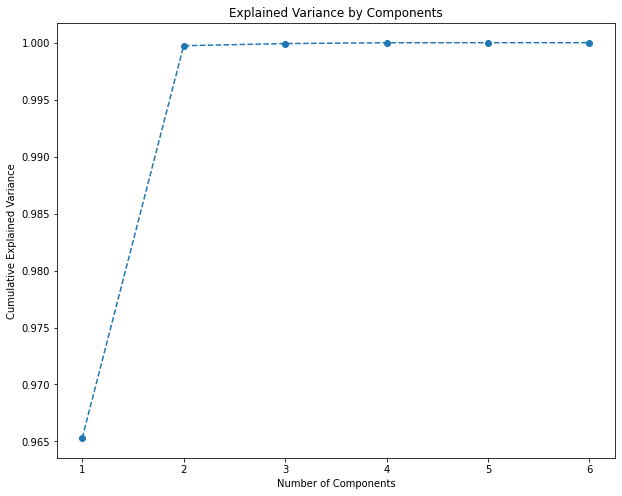

In [0]:
plt.figure(figsize=(10,8))
plt.plot(range(1,7) , pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

In [0]:
# from the chart above, dataset is pretty much can be classified with 1 axis Principal component. (elbow), sufficiently explainable by 2 clusters
# but for the sake of clustering, lets try to cluster into 3 main ones
pca = PCA(n_components=3)
pca.fit(df)

Out[85]: PCA(n_components=3)

In [0]:
pca.transform(segmentation_std)
# pca.transform(df)

Out[86]: array([[-418.88211646, -172.36422006, 64.15208066],
 [-419.01865007, -172.2558145 , 67.05188331],
 [-417.94311269, -171.57923635, 64.61995633],
 ...,
 [-417.50036146, -170.59748822, 65.91170454],
 [-417.09856595, -169.79633955, 66.354195 ],
 [-417.53775446, -169.59003196, 66.37521524]])

In [0]:
scores_pca = pca.transform(segmentation_std)
pd.DataFrame(pca.components_,columns=df.columns)

,SB_BIT,SB_FINES,TAIL LOSS,P300_PROD_FROTH_OSG_BIT_PCT,F/O,SB_MB
0,-0.000737,0.002507,0.999269,-0.001266,-0.000090,0.038128
1,-0.007876,0.045833,-0.038210,-0.002222,-0.000741,0.998184
2,-0.030994,0.020632,-0.001208,-0.999298,0.001746,-0.003461


In [0]:
# Within-Cluster-Sum-of-Squares
wcss = []
for i in range(1,11):
  kmeans_pca = KMeans(n_clusters=i,init='k-means++',random_state=22)
  kmeans_pca.fit(scores_pca)
  wcss.append(kmeans_pca.inertia_)

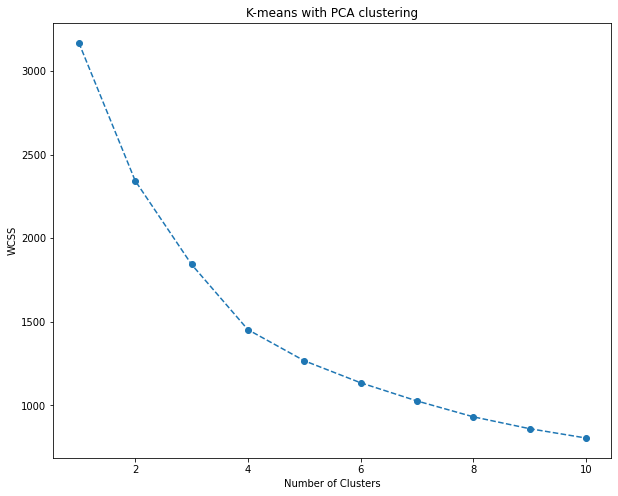

In [0]:
plt.figure(figsize=(10,8))
plt.plot(range(1,11) , wcss, marker = 'o', linestyle = '--')
plt.title('K-means with PCA clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

In [0]:
# from the chart above, I would say elbow is around cluster 3 and after
# it seems major steepness (Within Cluster Sum Square) starts at Cluster 3. we keep first 3 clusters 
kmeans_pca = KMeans(n_clusters=3, init='k-means++', random_state=22)
kmeans_pca.fit(scores_pca)

Out[90]: KMeans(n_clusters=3, random_state=22)

In [0]:
df_with_pca_cluster = pd.concat([df.reset_index(drop=True), pd.DataFrame(scores_pca)], axis=1)
df_with_pca_cluster.columns.values[-3:] = ['Component 1','Component 2','Component 3']
df_with_pca_cluster['K Means Cluster #'] = kmeans_pca.labels_
df_with_pca_cluster.head()

,SB_BIT,SB_FINES,TAIL LOSS,P300_PROD_FROTH_OSG_BIT_PCT,F/O,SB_MB,Component 1,Component 2,Component 3,K Means Cluster #
0,12.366241,11.886986,304.753479,69.730003,1.024637,126.016984,-418.882116,-172.364220,64.152081,1
1,12.376707,12.246460,282.760101,63.500000,1.098350,128.621417,-419.018650,-172.255815,67.051883,1
2,12.498686,11.405890,443.382812,68.690002,1.115944,150.539168,-417.943113,-171.579236,64.619956,1
3,12.655671,10.514458,376.271484,64.440002,1.060398,130.771433,-418.406938,-172.253215,66.577657,1
4,12.674402,11.581719,400.369812,65.690002,1.045395,121.961980,-418.259946,-172.534018,66.007880,1


In [0]:
df_with_pca_cluster['Segment'] = df_with_pca_cluster['K Means Cluster #'].map({0:'first',1:'second',2:'third'})

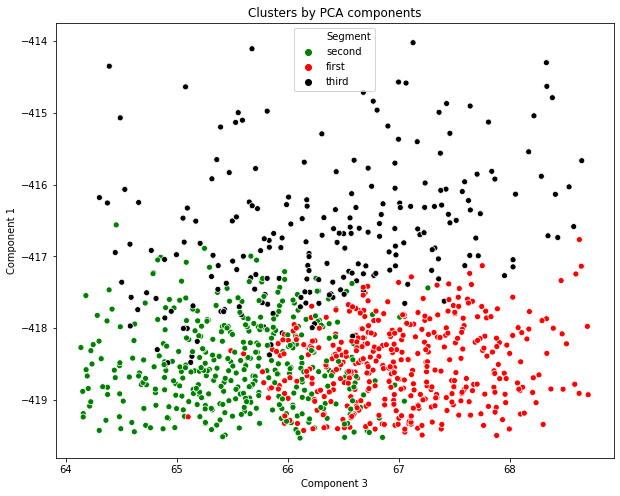

In [0]:
# PC1 vs PC2 - vary this to view 
x_axis = df_with_pca_cluster['Component 3']
y_axis = df_with_pca_cluster['Component 1']
plt.figure(figsize = (10,8))
sns.scatterplot(x_axis, y_axis, hue = df_with_pca_cluster['Segment'],palette= ['g','r','k'])
plt.title('Clusters by PCA components')
plt.show()

In [0]:
df_cluster = df_with_pca_cluster.set_index('Segment')

In [0]:
cluster_1 = df_cluster.loc['first']
cluster_2 = df_cluster.loc['second']
cluster_3 = df_cluster.loc['third']


In [0]:
cluster_1.describe()

,SB_BIT,SB_FINES,TAIL LOSS,P300_PROD_FROTH_OSG_BIT_PCT,F/O,SB_MB,Component 1,Component 2,Component 3,K Means Cluster #
count,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.0
mean,11.872560,15.028687,347.847231,63.629416,1.063229,191.551301,-418.506541,-170.058754,67.043787,0.0
std,0.459896,1.585441,82.940388,1.453022,0.097540,23.528696,0.543253,0.824082,0.672836,0.0
min,10.412600,10.997859,201.425247,60.090000,0.831052,122.010926,-419.496571,-172.503784,65.102777,0.0
25%,11.564725,13.937739,283.264572,62.605001,0.997549,176.814204,-418.923375,-170.602038,66.577627,0.0
50%,11.902925,14.952374,342.013214,63.770000,1.065729,190.716288,-418.537081,-170.069698,66.981612,0.0
75%,12.200084,16.015057,406.462738,64.639999,1.132305,205.712827,-418.117499,-169.543176,67.514325,0.0
max,13.005706,21.213738,616.090271,67.970001,1.292689,272.490226,-416.767323,-167.197506,68.709252,0.0


In [0]:
cluster_2.describe()

,SB_BIT,SB_FINES,TAIL LOSS,P300_PROD_FROTH_OSG_BIT_PCT,F/O,SB_MB,Component 1,Component 2,Component 3,K Means Cluster #
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.0
mean,12.175867,13.798263,355.428527,66.804541,1.078857,167.826828,-418.491653,-170.904572,65.539642,1.0
std,0.488080,1.744970,90.402982,1.425584,0.080352,24.768646,0.592896,0.874226,0.657383,0.0
min,10.679017,9.416021,201.339813,63.009998,0.802657,102.740647,-419.532517,-173.227238,64.135860,1.0
25%,11.859274,12.636826,283.605972,65.807499,1.025767,151.723418,-418.942192,-171.475869,65.087013,1.0
50%,12.151476,13.937250,344.771805,66.735001,1.079304,168.521456,-418.560769,-170.870574,65.573883,1.0
75%,12.491315,15.104373,422.022400,67.802502,1.129020,186.390229,-418.041032,-170.262404,66.030105,1.0
max,13.470199,18.184196,650.807251,69.800003,1.280801,256.370105,-416.562302,-167.795338,67.263747,1.0


In [0]:
cluster_3.describe()

,SB_BIT,SB_FINES,TAIL LOSS,P300_PROD_FROTH_OSG_BIT_PCT,F/O,SB_MB,Component 1,Component 2,Component 3,K Means Cluster #
count,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.0
mean,11.653597,15.921019,625.806359,65.111875,1.030011,207.138076,-416.666093,-169.575042,66.373065,2.0
std,0.488930,1.810908,145.635490,2.185313,0.088869,28.219757,0.939118,1.008057,1.014621,0.0
min,10.403407,10.851097,336.152313,60.299999,0.802986,150.257663,-418.483280,-171.561235,64.302426,2.0
25%,11.331586,14.698154,524.545608,63.625000,0.962958,188.784402,-417.318637,-170.250858,65.640179,2.0
50%,11.592517,15.467259,612.259521,65.059998,1.029556,202.543601,-416.766424,-169.763520,66.398570,2.0
75%,12.036090,17.194941,706.275253,66.765001,1.089259,224.961444,-416.164505,-168.964111,67.070652,2.0
max,12.833962,20.738810,1027.158569,69.500000,1.276768,303.919308,-414.022599,-166.205548,68.651047,2.0


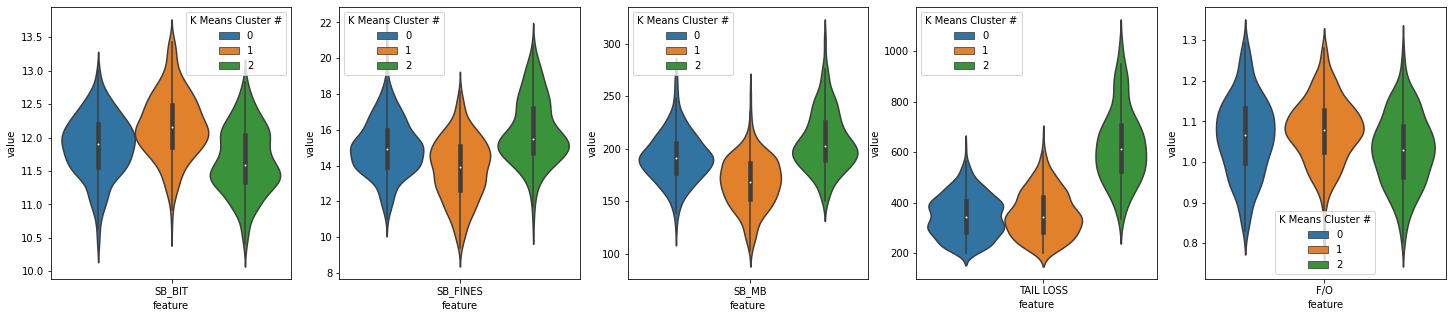

In [0]:
# not filtering training data from 2019 to 2020
feat_evaluate = ["SB_BIT", "SB_FINES","SB_MB", "TAIL LOSS","F/O"]
fig, ax = plt.subplots(1,5,figsize=(25,5))

for i in range(len(feat_evaluate)):
  df = df_with_pca_cluster[[feat_evaluate[i], "K Means Cluster #"]]
  df_long = pd.melt(df, "K Means Cluster #", var_name="feature", value_name="value")
  sns.violinplot(x="feature", hue="K Means Cluster #", y="value", data=df_long, ax=ax[i])

from this method, cluster 0 and cluster 1 is similar, and the major difference is that cluster 3 has higher tails loss, MB, Fines than the other cluster, 

lower bitumen content from the feed. this means that the procesability of the feed and its associated plant reaction can be clearly classified.

with the cluster 0-1 type feed is expected to be inevitable, there is a need for new operational gudiance to react to the deteriorating feed.